<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Данные" data-toc-modified-id="Данные-0.1">Данные</a></span></li></ul></li><li><span><a href="#Правило-3-сигм" data-toc-modified-id="Правило-3-сигм-1">Правило 3 сигм</a></span></li><li><span><a href="#Аварии-на-шахтах" data-toc-modified-id="Аварии-на-шахтах-2">Аварии на шахтах</a></span><ul class="toc-item"><li><span><a href="#Точечная-оценка-и-асимптотический-Д.И." data-toc-modified-id="Точечная-оценка-и-асимптотический-Д.И.-2.1">Точечная оценка и асимптотический Д.И.</a></span></li><li><span><a href="#Число-катастроф" data-toc-modified-id="Число-катастроф-2.2">Число катастроф</a></span></li><li><span><a href="#Дельта-метод" data-toc-modified-id="Дельта-метод-2.3">Дельта-метод</a></span></li></ul></li><li><span><a href="#Контрольная-работа" data-toc-modified-id="Контрольная-работа-3">Контрольная работа</a></span><ul class="toc-item"><li><span><a href="#Распределение-результатов-контрольной" data-toc-modified-id="Распределение-результатов-контрольной-3.1">Распределение результатов контрольной</a></span></li><li><span><a href="#Д.И.-для-среднего" data-toc-modified-id="Д.И.-для-среднего-3.2">Д.И. для среднего</a></span></li><li><span><a href="#Хорошие-и-плохие-студенты" data-toc-modified-id="Хорошие-и-плохие-студенты-3.3">Хорошие и плохие студенты</a></span></li><li><span><a href="#Д.И.-для-дисперсии" data-toc-modified-id="Д.И.-для-дисперсии-3.4">Д.И. для дисперсии</a></span></li><li><span><a href="#Доля-написавших-третью-контрольную" data-toc-modified-id="Доля-написавших-третью-контрольную-3.5">Доля написавших третью контрольную</a></span></li><li><span><a href="#Снова-разница-средних" data-toc-modified-id="Снова-разница-средних-3.6">Снова разница средних</a></span></li></ul></li></ul></div>

## Данные

Все датасеты лежат [тут](https://drive.google.com/open?id=1-psTZYeGvnr7UKt77X3D271N5BzNRxzZ)

Можно скачать эту папку, положить в соседнюю папку с рабочими ноутбуками и указать соответствующий путь `'../data/something.csv'`

# Правило 3 сигм

В этом упражнении мы обсудим правила двух и трех сигм для произвольной случайной величины. 

Пусть $X$ имеет некоторое распределение с математическим ожиданием $E[X] = a$ и конечной дисперсией $var(X) = \sigma^2 < \infty$. 

С помощью неравенства Чебышёва покажите, с какой вероятностью эта случайная величина лежит в отрезках $[a − 2\sigma, a + 2\sigma]$ и $[a − 3\sigma, a + 3\sigma]$. 

Сравните полученные вероятности с соответствующими вероятностями для стандартного нормального распределения $N (0, 1)$. Какой вывод можно сделать?

In [1]:
import numpy as np
import pandas as pd

from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [2]:
# можно заполнить ... формулой
for s in range(1,4):
    prob = 1 - 1 / s**2
    print(f'P(|X-E[X]|<{s}*std[X]) > ', prob)

P(|X-E[X]|<1*std[X]) >  0.0
P(|X-E[X]|<2*std[X]) >  0.75
P(|X-E[X]|<3*std[X]) >  0.8888888888888888


In [3]:
for s in range(1,4):
    prob = stats.norm().cdf(s) - stats.norm().cdf(-s)
    print(f'P(|X-E[X]|<{s}*var[X]) = ', prob)

P(|X-E[X]|<1*var[X]) =  0.6826894921370859
P(|X-E[X]|<2*var[X]) =  0.9544997361036416
P(|X-E[X]|<3*var[X]) =  0.9973002039367398


**Выводы:**
1. Неравенство Чебышёва справедливо по крайней мере для стандартного нормального закона распределения.
2. По меркам неравенства Чебышёва стандартная нормальная случайная величина содержит в рамках своих $\sigma$ очень большую вероятностную массу. Например, две $\sigma$ для $N (0, 1)$ соответствуют неравенству Чебышёва для трёх $\sigma$.
3. $N (0, 1)$ относится к одномодальным распределениям, для которых дейтсвует неравенсство Высочанского - Петунина, вводящее число 4/9 в неравенство Чебышёва. Проверим это.

In [4]:
for s in range(1,4):
    prob = 1 - 4 / (9 * s**2)
    print(f'P(|X-E[X]|<{s}*std[X]) > ', prob)

P(|X-E[X]|<1*std[X]) >  0.5555555555555556
P(|X-E[X]|<2*std[X]) >  0.8888888888888888
P(|X-E[X]|<3*std[X]) >  0.9506172839506173


Неравенство Высочанского - Петунина выполняется при $s > \sqrt{8/3} \approx 1,63299$, то есть в нашем случае для двух и трёх $\sigma$. Однако для $N (0, 1)$ этим ограничением, очевидно, можно пренебречь, так как оно важно только для некоторых асимметричных распределений.

# Аварии на шахтах

На угольных шахтах ежегодно происходят аварии. Англия довольно давно собирает информацию о числе крупных аварий. Именно её нам предстоит проанализировать:

* хочется понять как часто в среднем происходят аварии 
* насколько большой у среднего числа аварий доверительный интервал

In [5]:
df = pd.read_csv("coals.csv", index_col=0)
df.head()

,year,count
1,1851,4
2,1852,5
3,1853,4
4,1854,1
5,1855,0


В колонке `year` находится год наблюдений. В колонке `count` число аварий за этот год на шахтах в Англии. Посмотрим на распределение числа аварий. 

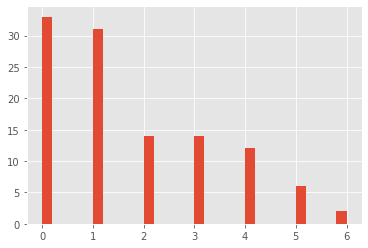

In [6]:
df['count'].hist(bins=30);

## Точечная оценка и асимптотический Д.И.

Судя по гистограмме уместно предположить, что число аварий имеет распределение Пуассона, $Poiss(\lambda)$.  То есть, если мы хотим что-то понять про среднее число аварий, нам надо оценить параметр $\lambda$. 

__Точечная оценка__

Найдите оценку параметра $\lambda$ с помощью метода моментов и метода максимального правдоподобия. Запишите получившийся результат в переменную `lambda_hat`.

__Стандартное отклонение__ 

Среднее, оценённое методом моментов будет иметь асимптотически нормальное распределение. Оцените стандартное отклонение этого распределения по выборке и запишите ответ в переменную `lam_se`. 

> __Примечание:__ мы предполагаем, что выборка пришла из распределения Пуассона. Для него $Var(X) = \lambda$. Для оценки стандартного отклонения используйте этот факт. 

__Доверительный интервал__ 

Постройте для неизвестного математического ожидания $\lambda$ доверительный интервал. Возьмите уровень значимости равный $10\%$. В переменные `left` и `right` запишите соотвествующие границы интервала. В переменную `delta` запишите его ширину.

In [7]:
# число наблюдений 
n_hat = len(df)

# ваша оценка метода моментов для лямбды
lam_hat = df['count'].mean()

# ваша оценка для ст. отклонения
lam_se = lam_hat**0.5

# уровень значимости
alpha = 0.1

# квантиль норм. распределения
z = stats.norm.ppf(1 - alpha/2)

# левая граница дов. интервала
left = lam_hat - z * lam_se / np.sqrt(n_hat)

# правая граница дов. интервала
right = lam_hat + z * lam_se / np.sqrt(n_hat)

# ширина дов. интервала
delta = right - left

print(left, right)

# проверка, что границы доверительного интервала найдены верно
assert np.abs(left - 1.502389916114217) < 1e-5

1.502389916114217 1.9083243696000687


## Число катастроф

Многие говорят, что в $20$ веке катастроф стало на порядок меньше. Давайте проверим это. Постройте оценку для $\lambda_1$ по данным до $1900$ года включительно. Постройте оценку для $\lambda_2$ по данным после $1900$ года. Для разности $\lambda_1 - \lambda_2$ постройте $95\%$ доверительный интервал. 

Ноль не вошёл в этот доверительный интервал. Это означает, что на уровне значимости $5\%$ мы можем сказать, что число аварий правда снизилось. 

In [8]:
x = df[df.year <= 1900]['count']
y = df[df.year > 1900]['count']

alpha = 0.05
z = stats.norm.ppf(1 - alpha/2)

dif = x.mean() - y.mean()
std = np.sqrt(x.mean()/len(x) + y.mean()/len(y))

left = dif - z*std
right = dif + z*std
delta = right - left

print(left, right)

# проверка, что границы доверительного интервала найдены верно
assert x.size == 50
assert np.abs(left - 1.2835473859716393) < 1e-5

1.2835473859716393 2.3100010011251353


## Дельта-метод

__Вероятность для распределения Пуассона__ 

Вспомните формулу, по которой считается вероятность того, что Пуассоновская случайная величина примет какое-то значение. Найдите точечную оценку вероятности того, что произойдёт только одна авария. В качестве $\lambda$ используйте оценку метода моментов, полученную в первом задании. 

In [9]:
from scipy.special import factorial
def poiss_prob(k, lam_hat=lam_hat):
    prob = pow(lam_hat, k) * pow(np.e, -lam_hat) / factorial(k)
    return prob

# проверка функции
assert np.abs(poiss_prob(1) - 0.3098761) < 1e-5

__Дельта-метод__ 

Та вероятность, которую мы нашли в предыдущем пункте - это лишь точечная оценка. Она является функцией от среднего. С помощью дельта-метода постройте для этой вероятности $95\%$ довертельный интервал.

In [10]:
def poiss_prob_der2(k, lam_hat=lam_hat):
    prob_der = ((k * pow(lam_hat, k-1) * pow(np.e, -lam_hat) -
                 pow(lam_hat, k) * pow(np.e, -lam_hat))/ factorial(k)) ** 2
    return prob_der

k = 1

alpha = 0.05
z = stats.norm.ppf(1 - alpha/2)

std = np.sqrt(lam_hat * poiss_prob_der2(k) / n_hat)

left = poiss_prob(k) - std*z
right = poiss_prob(k) + std*z
delta = left - right

print(left, right)

# проверка, что интервал построен корректно
assert np.abs(left - 0.279) < 1e-3

0.27887850777625484 0.34087378686549136


По аналогии можно построить доверительные интервалы для вероятности того, что случайная величина примет значения от нуля до девяти. Проделайте это в качестве необязательного упражнения и оформите процедуру расчёта в виде функции.

In [11]:
def prob_ci(k, alpha = 0.01, lam_hat=lam_hat):
    z = stats.norm.ppf(1 - alpha/2)
    std = np.sqrt(lam_hat * poiss_prob_der2(k) / n_hat)
    left = poiss_prob(k) - std*z
    right = poiss_prob(k) + std*z
    return left, right

In [12]:
# проверка дов. интервала
left, right = prob_ci(1)
delta = right - left
assert np.abs(delta - 0.08147) < 1e-5


left, right = prob_ci(0)
delta = right - left
assert np.abs(delta - 0.11551) < 1e-5



Сделали функцию? Запускайте код для не очень информативной картинки!

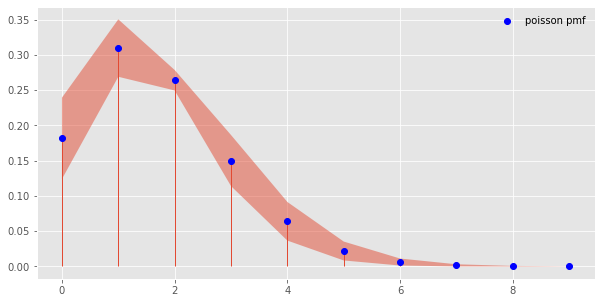

In [13]:
poiss_rv = stats.poisson(lam_hat)

x = np.arange(10)

p = poiss_rv.pmf(x)
left, right = prob_ci(x)

plt.figure(figsize=(10,5))
plt.plot(x, p, 'bo', ms=6, label='poisson pmf')
plt.fill_between(x, left, right, alpha=0.5)
plt.vlines(x, 0, p, lw=1)
plt.legend(loc='best', frameon=False)
plt.show()


In [14]:
for k,(i,j) in enumerate(zip(left, right)):
    print(f"Вероятность P(X={k}) лежит между  {i:.5} и {j:.5}")

Вероятность P(X=0) лежит между  0.12395 и 0.23946
Вероятность P(X=1) лежит между  0.26914 и 0.35061
Вероятность P(X=2) лежит между  0.24971 и 0.27873
Вероятность P(X=3) лежит между  0.11396 и 0.18644
Вероятность P(X=4) лежит между  0.036649 и 0.091422
Вероятность P(X=5) лежит между  0.0084293 и 0.035252
Вероятность P(X=6) лежит между  0.0012388 и 0.011177
Вероятность P(X=7) лежит между  1.9936e-05 и 0.0030047
Вероятность P(X=8) лежит между  -5.5837e-05 и 0.00070061
Вероятность P(X=9) лежит между  -2.1966e-05 и 0.00014414


Интервалы получился довольно короткими. Попробуйте поиграться с уровнем значимости и посмотреть как они меняются в зависимости от него. 

Мы из теории вероятностей знаем, что для случайной величины $X$, имеющей распределение Пуассона $\mathbb{E}(X) = Var(X) = \lambda$. Для текущей выборки мы видим, что между дисперсией и средним есть небольшое отличие.  

Не факт, что мы имеем право предполагать, что наша выборка пришла к нам из распределения Пуассона. Все предпосылки о распределениях выборки нужно тестировать. Позже мы научимся это делать.

In [15]:
df['count'].mean(), df['count'].var()

(1.7053571428571428, 2.7142052767052722)

# Контрольная работа

В файле `cr.csv` лежат результаты контрольной работы, которая проводилась в Вышке на факультете "Э".  По мнению студентов эти оценки смещённые, несостоятельные и ужасно неэффективные. Но это уже совершенно другая история. Подгрузим файлик и посмотрим на него!  

In [16]:
df = pd.read_csv('cr.csv')
print(df.shape)
df.head()

(389, 19)


,fraud,k1a,k1b,k1c,k1d,k1e,k1f,k1,k2a,k2b,k2c,k2d,k2e,k2f,k2,k3a,k3b,k3c,k3
0,0.0,10.0,10.0,20.0,30.0,4.0,22.0,10.1,20.0,10.0,20.0,20.0,20.0,20.0,11.0,35.0,0.0,27.0,6.2
1,1.0,9.0,10.0,20.0,NaN,16.0,12.0,6.7,NaN,5.0,NaN,20.0,20.0,20.0,6.5,35.0,29.0,22.0,8.6
2,0.0,2.0,10.0,20.0,NaN,20.0,30.0,8.2,20.0,5.0,NaN,20.0,20.0,20.0,8.5,28.0,2.0,0.0,3.0
3,1.0,10.0,10.0,20.0,NaN,16.0,14.0,7.0,20.0,10.0,NaN,20.0,20.0,20.0,9.0,30.0,38.0,0.0,6.8
4,2.0,10.0,10.0,12.0,0.0,16.0,22.0,7.0,20.0,10.0,NaN,20.0,20.0,20.0,9.0,0.0,0.0,0.0,0.0


__Описание колонок:__

* `fraud` - в списывании скольки задач был уличён студент 
* `k1` - результат за первую контрольную, `k1a - k1f` в разбивке по задачам
* `k2` - результат за вторую контрольную, `k2a - k2f` в разбивке по задачам
* `k3` - результат за третью контрольную, `k3a - k3с` в разбивке по задачам

## Распределение результатов контрольной

- Запишите все оценки за первую контрольную в переменную `x`, все пропуски удалите
- Найдите среднее и стандартное отклонение (используйте несмещённую оценку) 
- Постройте гистограмму результатов за первую контрольную 
- На этой же картинке постройте плотность нормального распределения со средним и стандартным отклонением, посчитанными выше

Похоже ли эмпирическое распределение на нормальное? 

In [17]:
x = df['k1'].dropna()
n = len(x)
x_mean = x.mean()
x_std = x.std()

# Проверим, что метод std() по умолчанию возвращает несмещённую оценку:

sum2 = 0
for i in range(len(x)):
    sum2 +=(x[i] - x_mean) ** 2
x_std = np.sqrt(sum2 / (n - 1))

x_std == x.std()

True

In [18]:
# sns.histplot(...)

In [19]:
# проверка, что среднее посчитано корректно
assert np.abs(x_mean - 5.4478149100) < 1e-5

Предположим невероятное! А именно, независимость и одинаковую распределённость наших наблюдений (никто не списывал контрольную друг у друга).

## Д.И. для среднего

Постройте точный $95\%$-й доверительный интервал для ожидамоего результата за первую контрольную. В качестве оценки стандартного отклонения используйте несмещённый вариант, `ddof=1`. В переменные `left` и `right` запишите границы получившегося интервала. В переменную `delta` его ширину. 

In [20]:
alpha = 0.05

margin = stats.t(n - 1).ppf(1 - alpha/2)    # отступ от среднего
left =  x_mean - margin * x_std / np.sqrt(n)     # левая граница интервала
right = x_mean + margin * x_std / np.sqrt(n)     # правая граница интервала
delta = right - left     # ширина интервала

print(left, right)

5.13247213744281 5.76315768260861


In [21]:
# проверка, что границы доверительного интервала найдены верно
assert np.abs(left - 5.13247213744281) < 1e-5

## Хорошие и плохие студенты

Переменная`fraud` - в списывании скольки задач был уличён студент. Разобьём наши наблюдения на две группы: Хорошие и Плохие. У Хороший `fraud == 0`, у Плохих `fraud > 0`. 

Запишите оценки за первую контрольную для хороших в переменную `good`, для плохих в `bad`. Все пропуски из выборки удалите. Постройте на общем фоне гистограмму распределения оценок за первую контрольную у хороших и плохих. 

__Интервал для разницы средних__ 

Постройте примерный $95\%$-й доверительный интервал для разницы ожидаемого результата за первую контрольную у хороших и плохих студентнов без предположения о равенстве дисперсий (интервал Уэлча). Для оценки всех дисперсий используйте несмещённый вариант. Заполните все переменные, перечисленные ниже. 

Входит ли в получившийся доверительный интервал ноль? Как думаете, что это означает? 

> В интервал входит ноль. Это значит, что нельзя сделать однозначные выводы о более высоких ожидаемых успехах в написании первой контрольной "хороших" или "плохих" студентов.

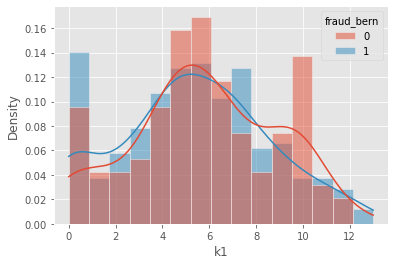

In [37]:
df['fraud_bern'] = df.fraud.apply(lambda x: 0 if x == 0 else 1)
sns.histplot(data=df, 
    x='k1', hue='fraud_bern',
    stat='density', common_norm=False, bins=15, kde=True
);

In [32]:
good = df[df.fraud == 0]['k1'].dropna()
bad = df[df.fraud > 0]['k1'].dropna()

alpha = 0.05

ng = len(good)
nb = len(bad)

u = (good.var() / ng + bad.var() / nb) ** 2
d = (good.var()**2) / (ng**2 * (ng - 1)) + (bad.var()**2) / (nb**2 * (nb - 1))
nu = u/d       # число степеней свободы в распределении Стьюдента
std = np.sqrt(good.var() / ng + bad.var() / nb)
margin = stats.t(nu).ppf(1 - alpha/2) * std    # отступ от среднего
diff = good.mean() - bad.mean()
left =  diff - margin     # левая граница интервала
right = diff + margin     # правая граница интервала
delta = right - left     # ширина интервала

print(left, right)

-0.8045581262764373 0.5469728051755148


In [33]:
# проверка того, сколько в выборке оказалось ангелов и демонов
assert len(good) == 109

# проверка, что границы доверительного интервала найдены верно
assert np.abs(left + 0.8045581262764373) < 1e-5

## Д.И. для дисперсии

Предположим, что математическое ожидание результата за контрольную зависит от уровня подготовки, а дисперсия результата — от нервов. Постройте для отношения нервозности плохих и хороших студентов $95\%$ доверительный интервал. Для оценки всех дисперсий используйте несмещённый вариант. 

Вошла ли в доверительный интервал единица? Как думаете, что это означает? 

> Единица вошла. Это значит, что нельзя сделать однозначного вывода о большей нервозности плохих студентов.

In [24]:
alpha = 0.05
left = bad.var() / good.var() * stats.f(nb - 1, ng - 1).ppf(alpha / 2)     # левая граница интервала
right = bad.var() / good.var() * stats.f(nb - 1, ng - 1).ppf(1 - alpha / 2)     # правая граница интервала
delta = right - left     # ширина интервала

print(left, right)

0.6247510406208133 1.18651883159908


In [25]:
# проверка, что границы доверительного интервала найдены верно
assert np.abs(left - 0.6247510406208133) < 1e-5

## Доля написавших третью контрольную

У студентов был выбор: писать или не писать третью контрольную. Если в колонке `k3` стоит $0$, значит студент не стал это делать. Постройте асимптотический $95\%$-й доверительный интервал для разницы долей хороших и плохих студентов, которые решили писать третью контрольную. 

__Примечание:__ На практике, если мы пользуемся асимптотическими доверительными интервалами, мы можем искать границы двумя способами:

* __Первый__ состоит в том, что мы оцениваем стандартное отклонение с помощью $\sqrt{\hat{p} \cdot (1 - \hat{p})} = \sqrt{\bar{x} \cdot (1 - \bar{x})}$. 
* __Второй способ__ состоит в том, чтобы оценить стандартное отклонение как  $\sqrt{\frac{1}{n-1} \cdot \sum_{i=1}^n (x_i - \bar{x})^2}$. 

В плане асимптотики это не влияет на выводы, так как обе этих оценки состоятельно оценивают дисперсию. Можно пользоваться любым. 

Входит ли в доверительный интервал ноль? Как думаете, что это означает? 

> В интервал вошёл ноль. Значит, нельзя сделать однозначный вывод, что доля хороших студентов, решивших писать третью контрольную, больше, чем аналогичная доля плохих студентов.

In [26]:
df['k3_bern'] = df.k3.apply(lambda x: 0 if x == 0 else 1)

In [27]:
good = df[df.fraud == 0]['k3_bern'].dropna()
bad = df[df.fraud > 0]['k3_bern'].dropna()

pg = good.mean()
pb = bad.mean()
diff = pg - pb

vg = pg * (1 - pg)
vb = pb * (1 - pb)

ng = len(good)
nb = len(bad)

alpha = 0.05
margin = stats.norm().ppf(1 - alpha/2) * np.sqrt(vg/ng + vb/nb)

left =  diff - margin     # левая граница интервала
right = diff + margin     # правая граница интервала
delta = right - left     # ширина интервала

print(left, right)

-0.1884946955049297 0.03341212669759032


In [28]:
# проверка, что границы доверительного интервала найдены верно
assert np.abs(left + 0.1885) < 1e-3

## Снова разница средних

Посмотрим на результаты студентов в динамике. Постройте точный $95\%$ доверительный интервал для средней разницы оценок за вторую и первую контрольные. Пропуски в данных заполните нулями. 

Входит ли в доверительный интервал ноль? Как думаете, что это означает? 

> Ноль не попал. Можно делать выводы об отрицательной динамике успеваемости студентов.

In [29]:
diff = df.k2.replace(np.nan, 0) - df.k1.replace(np.nan, 0)

In [30]:
mean = diff.mean()
s = diff.std()
n = len(diff)

alpha = 0.05
margin = stats.t(n - 1).ppf(1 - alpha/2) * s / np.sqrt(n)

left = mean - margin     # левая граница интервала
right = mean + margin     # правая граница интервала
delta = right - left     # ширина интервала

print(left, right)

-1.4562881732820103 -0.7072079706768579


In [31]:
# проверка, что границы доверительного интервала найдены верно
assert np.abs(left + 1.4562881732820103) < 1e-5

Это домашка подошла к концу!

Поздравляю! 

Теперь вы умеете строить 
- асимптотические доверительные интервалы для любых выборок
- точные доверительные интервалы для нормальных выборок
